In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import theano
import theano.tensor as T
import matplotlib.pyplot as plt

import os, sys
sys.path.append('../code')

from retina2 import *

/home/oalenkin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import warnings
warnings.filterwarnings('ignore')

# reading data

In [3]:
data = pd.read_csv('../data/hits.csv', index_col=0)

# choose event

In [214]:
event = data[data.EventID==4566]
event_before_magnet = event[event.StatNb<3]
event_after_magnet = event[event.StatNb>2]

# test

choose two pairs of crossed lines drom one track

In [223]:
art_event = event_before_magnet
art_event = event_after_magnet

parameters of track:

In [224]:
track1 = get_track_params(art_event, 2)
track1

[49.457631025285551,
 0.0026716993224846892,
 -147.68601903420154,
 -0.0031651641821462007]

In [225]:
track2 = get_track_params(art_event, 3)
track2

[90.793449357929347,
 0.024431849010968881,
 35.70042784803173,
 -0.12777040654417182]

In [226]:
retina = RetinaTrackReconstruction(sigma_from=.8, sigma_to=.4, stopping_criteria=0.00001, inlier_treshold=.45,\
                                   pre_sigma=0.4)

In [227]:
%%time
dists = art_event.dist2Wire.values
#dists = np.zeros(len(art_event))
dots = retina.fit(art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, dists)

CPU times: user 1.48 s, sys: 16 ms, total: 1.49 s
Wall time: 1.48 s


In [64]:
#scaler = Scaler(z_scale=1500)
#dot=[-10.27872594, -14.66929214, 55.4286, -0.]
#artificial_retina_response_grad2(scaler.parameters_inverse_transform(dot),\
#                           art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, 0.8, art_event.dist2Wire.values)

In [65]:
artificial_retina_response(scaler.parameters_inverse_transform(dot),\
                           art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, 0.8, art_event.dist2Wire.values)

NameError: name 'scaler' is not defined

In [132]:
#for dots in new_dots_array:
plt.scatter(dots[0][1], dots[0][3], c='blue')
plt.scatter(dots[-1][1], dots[-1][3], c='yellow')
for j in range(len(dots)-1):
    plt.plot([dots[j][1], dots[j+1][1]], [dots[j][3], dots[j+1][3]], c='blue')

plt.scatter(track1[1], track1[3], c='red')
plt.scatter(track2[1], track2[3], c='red')
plt.title('l-m')

TypeError: 'NoneType' object has no attribute '__getitem__'

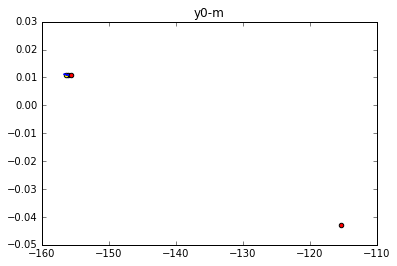

In [13]:
#for dots in new_dots_array:
plt.scatter(dots[0][2], dots[0][3], c='blue')
plt.scatter(dots[-1][2], dots[-1][3], c='yellow')
for j in range(len(dots)-1):
    plt.plot([dots[j][2], dots[j+1][2]], [dots[j][3], dots[j+1][3]], c='blue')
        
plt.scatter(track1[2], track1[3], c='red')
plt.scatter(track2[2], track2[3], c='red')
plt.title('y0-m')

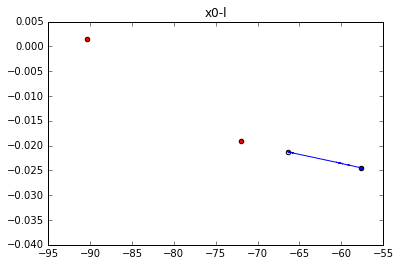

In [14]:
#for dots in new_dots_array:
plt.scatter(dots[0][0], dots[0][1], c='blue')
plt.scatter(dots[-1][0], dots[-1][1], c='yellow')
for j in range(len(dots)-1):
    plt.plot([dots[j][0], dots[j+1][0]], [dots[j][1], dots[j+1][1]], c='blue')
        
plt.scatter(track1[0], track1[1], c='red')
plt.scatter(track2[0], track2[1], c='red')
plt.title('x0-l')

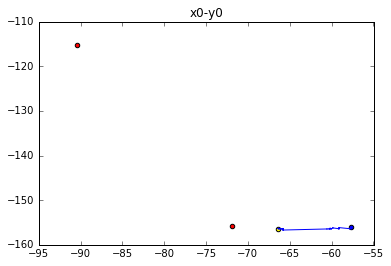

In [15]:
#for dots in new_dots_array:
plt.scatter(dots[0][0], dots[0][2], c='blue')
plt.scatter(dots[-1][0], dots[-1][2], c='yellow')
for j in range(len(dots)-1):
    plt.plot([dots[j][0], dots[j+1][0]], [dots[j][2], dots[j+1][2]], c='blue')
        
plt.scatter(track1[0], track1[2], c='red')
plt.scatter(track2[0], track2[2], c='red')
plt.title('x0-y0')

In [239]:
artificial_retina_response([0, 0, 0, 0], art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, 1)

array(0.0)

In [17]:
values = [artificial_retina_response(dots[i], art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, 1) for i in range(len(dots))]

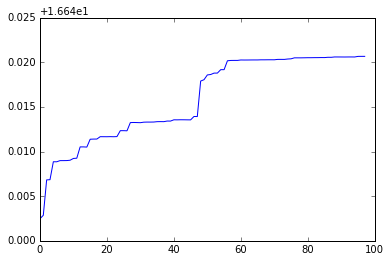

In [18]:
plt.plot(range(len(dots)), values)

In [19]:
artificial_retina_response(track1, art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, 1)

array(16.64650458022106)

In [228]:
noise = art_event[((art_event.ViewNb==0)|(art_event.ViewNb==3))&(art_event.TrackID==-2)]

y_track1 = art_event[((art_event.ViewNb==0)|(art_event.ViewNb==3))&(art_event.TrackID==2)]
y_track_params1 = np.polyfit(y_track1.Wz1.values, y_track1.Wy1.values, 1)

y_track2 = art_event[((art_event.ViewNb==0)|(art_event.ViewNb==3))&(art_event.TrackID==3)]
y_track_params2 = np.polyfit(y_track2.Wz1.values, y_track2.Wy1.values, 1)

min_z = np.min(art_event.Wz) - 20
max_z = np.max(art_event.Wz) + 20

dots = retina.tracks_params_

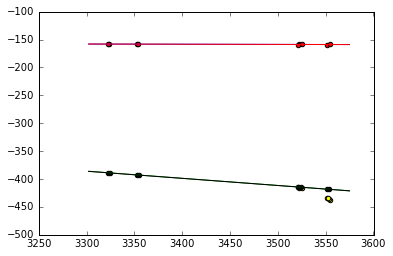

In [229]:
plt.scatter(noise.Wz.values, noise.Wy1.values, c='yellow')
plt.scatter(y_track1.Wz.values, y_track1.Wy1.values, c='red')
plt.scatter(y_track2.Wz.values, y_track2.Wy1.values, c='black')
plt.plot([min_z, max_z], [dots[-1][2] + min_z*dots[-1][3], dots[-1][2] + max_z*dots[-1][3]], c='green')
plt.plot([min_z, max_z], [dots[0][2] + min_z*dots[0][3], dots[0][2] + max_z*dots[0][3]], c='blue')
plt.plot([min_z, max_z], [y_track_params1[1] + min_z*y_track_params1[0], y_track_params1[1] + max_z*y_track_params1[0]], c='red')
plt.plot([min_z, max_z], [y_track_params2[1] + min_z*y_track_params2[0], y_track_params2[1] + max_z*y_track_params2[0]], c='black')
#plt.ylim([170, 195])

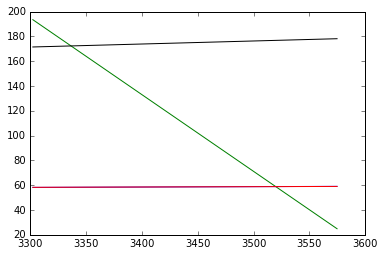

In [230]:
plt.plot([min_z, max_z], [dots[-1][0] + min_z*dots[-1][1], dots[-1][0] + max_z*dots[-1][1]], c='green')
plt.plot([min_z, max_z], [dots[0][0] + min_z*dots[0][1], dots[0][0] + max_z*dots[0][1]], c='blue')
plt.plot([min_z, max_z], [track1[0] + min_z*track1[1], track1[0] + max_z*track1[1]], c='red')
plt.plot([min_z, max_z], [track2[0] + min_z*track2[1], track2[0] + max_z*track2[1]], c='black')
#plt.ylim([200, 300])

In [231]:
retina.labels_

array([ 1,  0,  1,  0,  1,  0, -1,  0, -1,  1,  0,  1,  0,  0,  0,  1,  0,
        0,  0,  1, -1,  1,  0,  1,  1,  1,  0, -1, -1, -1,  1,  1, -1,  0,
        1,  0,  1,  1, -1,  0,  1,  0,  1, -1,  1,  0, -1])

In [232]:
retina.tracks_params_

array([[  4.79995541e+01,   3.09477733e-03,  -1.47685744e+02,
         -3.16857803e-03],
       [  2.23583454e+03,  -6.18474343e-01,   3.84806177e+01,
         -1.28582021e-01]])

In [233]:
art_event.Label.values

array([ 1.,  0.,  1.,  0.,  1.,  0., -1.,  0., -1.,  1.,  0.,  1.,  0.,
        0.,  0., -1.,  0.,  0.,  0.,  1., -1., -1.,  0., -1.,  1.,  1.,
        0.,  1., -1., -1., -1.,  1.,  1.,  0., -1.,  0.,  1., -1.,  1.,
        0., -1.,  0.,  1., -1.,  1.,  0.,  1.])

In [234]:
art_event.Label.values==retina.labels_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False,  True,  True, False,  True, False,  True, False,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True, False], dtype=bool)

In [58]:
dots

In [168]:
retina.initial_dots_generator(art_event[art_event.Label.values==0][['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values)

array([[  4.02075692e+02,  -1.58999656e-01,   1.80286010e+01,
         -0.00000000e+00],
       [ -3.60938142e+02,   6.88088733e-02,  -4.71802683e+01,
          1.94690265e-02],
       [  1.29095188e+03,  -4.26128815e-01,   1.80286010e+01,
         -0.00000000e+00],
       [  4.28048171e+02,  -1.68354376e-01,  -5.29548422e+01,
          2.12048193e-02],
       [ -1.41715664e+03,   3.62771545e-01,   1.75886010e+01,
         -0.00000000e+00],
       [ -4.47474372e+02,   8.93724446e-02,   1.07276902e+02,
         -2.52873563e-02],
       [ -4.02859766e+02,   7.67934861e-02,   1.75886010e+01,
         -0.00000000e+00],
       [  5.13150316e+02,  -1.81472898e-01,   9.86575073e+01,
         -2.28571429e-02],
       [ -2.18944802e+03,   5.81636869e-01,   1.75886010e+01,
         -0.00000000e+00],
       [ -1.34275864e+03,   3.43039707e-01,   9.86997930e+01,
         -2.28571429e-02],
       [ -1.19478644e+03,   3.01341124e-01,   1.75886010e+01,
         -0.00000000e+00],
       [ -3.86977583e

In [167]:
art_event[art_event.Label.values==0]

,EventID,TrackID,PdgCode,DetectorID,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,Px,...,Z,dist2Wire,Wx1,Wx2,Wy1,Wy2,Wz,Wz1,Wz2,Label
85200,2002,2.0,211.0,31102268.0,3,1,1,0,268,-0.516624,...,3333.749756,0.190267,-251.540335,246.557014,6.690876,50.268747,3333.8793,3333.8793,3333.8793,0.0
85204,2002,2.0,211.0,33102274.0,3,3,1,0,274,-0.516829,...,3353.750000,0.346809,-250.000000,250.000000,18.028600,18.028600,3353.7500,3353.7500,3353.7500,0.0
85198,2002,2.0,211.0,30102274.0,3,0,1,0,274,-0.516783,...,3323.750000,0.344001,-250.000000,250.000000,18.028600,18.028600,3323.7500,3323.7500,3323.7500,0.0
85199,2002,2.0,211.0,31002268.0,3,1,0,0,268,-0.516819,...,3331.150391,0.254079,-251.578684,246.518665,7.129202,50.707073,3331.2793,3331.2793,3331.2793,0.0
85202,2002,2.0,211.0,32112281.0,3,2,1,1,281,-0.516728,...,3344.849609,0.157639,-248.474440,249.622909,28.352464,-15.225407,3344.9793,3344.9793,3344.9793,0.0
85201,2002,2.0,211.0,32002281.0,3,2,0,0,281,-0.516791,...,3341.150635,0.289154,-248.512789,249.584560,27.914138,-15.663733,3341.2793,3341.2793,3341.2793,0.0
85211,2002,2.0,211.0,43012275.0,4,3,0,1,275,-0.517010,...,3552.249756,0.236397,-250.000000,250.000000,17.588600,17.588600,3552.2500,3552.2500,3552.2500,0.0
85209,2002,2.0,211.0,42002281.0,4,2,0,0,281,-0.516757,...,3541.150146,0.057361,-248.512789,249.584560,27.914138,-15.663733,3541.2793,3541.2793,3541.2793,0.0
85197,2002,2.0,211.0,30012275.0,3,0,0,1,275,-0.516892,...,3322.250000,0.096369,-250.000000,250.000000,17.588600,17.588600,3322.2500,3322.2500,3322.2500,0.0
85208,2002,2.0,211.0,41112268.0,4,1,1,1,268,-0.516767,...,3534.850586,0.205604,-251.617032,246.480317,7.567527,51.145399,3534.9793,3534.9793,3534.9793,0.0


In [44]:
event[(event.TrackID==3)&(event.StatNb>2)]

,EventID,TrackID,PdgCode,DetectorID,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,Px,...,Z,dist2Wire,Wx1,Wx2,Wy1,Wy2,Wz,Wz1,Wz2,Label
157999,3670,3.0,13.0,31102143.0,3,1,1,0,143,-0.337498,...,3333.758057,0.307726,-270.714599,227.382750,225.853710,269.431581,3333.8793,3333.8793,3333.8793,1.0
158000,3670,3.0,13.0,41002141.0,4,1,0,0,141,-0.327816,...,3531.142578,0.331607,-271.059735,227.037614,229.798641,273.376512,3531.2793,3531.2793,3531.2793,1.0
157998,3670,3.0,13.0,31012144.0,3,1,0,1,144,-0.337080,...,3332.247559,0.092714,-270.676250,227.421099,225.415384,268.993255,3332.3793,3332.3793,3332.3793,1.0
158001,3670,3.0,13.0,41112141.0,4,1,1,1,141,-0.327753,...,3534.850586,0.024389,-271.098084,226.999265,230.236966,273.814838,3534.9793,3534.9793,3534.9793,1.0


In [186]:
a = np.array([1,2])

In [187]:
np.array(list(a)*2)

array([1, 2, 1, 2])

In [250]:
dist2Wire = 0.
sigma = 0.3
xs = np.linspace(0, 1, 100)
ys = np.exp(-(xs-dist2Wire)**2/sigma**2)

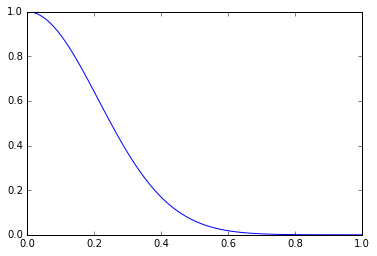

In [251]:
plt.plot(xs, ys)
plt.plot([dist2Wire, dist2Wire], [0, 1], c='red')